<a href="https://colab.research.google.com/github/jeguns/EP7173/blob/main/Unidad%2003/03_Tratamiento_de_valores_perdidos_descripci%C3%B3n_y_mecanismos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalación de paquetes**

In [1]:
pip install pandas==1.5.3 &> /dev/null

In [2]:
import pandas as pd

In [3]:
print(pd.__version__)

1.5.3


In [4]:
pip install rpy2 &> /dev/null

In [5]:
import rpy2

In [6]:
print(rpy2.__version__)

3.4.2


# **Ejemplo**

In [7]:
datos = pd.read_csv('03 - datos_diabetes.csv',  sep = ";")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Edad          60 non-null     int64  
 1   Sexo          60 non-null     object 
 2   Ingresos      60 non-null     object 
 3   Sueno         59 non-null     object 
 4   Enfermedades  60 non-null     object 
 5   Estres        47 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.9+ KB


La lectura inicial de los datos ha sido incorrecta en cuanto a los tipos de variables y la cantidad de datos perdidos reconocidos, que en este caso son 0. Entonces, al momento de realizar la lectura, se puede declarar cuál es (o cuáles son) la manera de identificar un dato perdido.

In [9]:
datos = pd.read_csv('03 - datos_diabetes.csv', sep = ";", na_values=["-"])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Edad          60 non-null     int64  
 1   Sexo          60 non-null     object 
 2   Ingresos      36 non-null     float64
 3   Sueno         54 non-null     float64
 4   Enfermedades  60 non-null     object 
 5   Estres        47 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ KB


In [10]:
new_column_names = {
    'Ingresos Anuales': 'Ingresos',
    'Horas de Sueño por Noche': 'Sueno',
    'Historial de Enfermedades Crónicas': 'Enfermedades',
    'Nivel de Estrés': 'Estres'
}

datos = datos.rename(columns=new_column_names)
datos.head(5)

,Edad,Sexo,Ingresos,Sueno,Enfermedades,Estres
0,56,Masculino,NaN,5.4,Si,8.0
1,66,Femenino,90592.0,9.4,Si,8.0
2,64,Masculino,74268.0,NaN,No,NaN
3,44,Femenino,28110.0,7.8,Si,10.0
4,20,Femenino,82623.0,5.0,Si,NaN


# Identificación de valores perdidos

En Python, nan significa Not a Number, es decir es un valor perdido de tipo numérico (un valor numérico indefinido). Se utiliza principalmente para representar valores faltantes o no definidos en cálculos matemáticos y científicos. Por otro lado, None es de tipo object, se utiliza para representar la ausencia de un valor en cualquier tipo de objeto.

In [11]:
import numpy as np
a = np.nan
a-3, a*2, type(a)

(nan, nan, float)

In [13]:
b = None
# b*2 # Quite el # inicial y ejecute

¿Dónde están los valores perdidos?

In [14]:
datos.head(5).isna()

,Edad,Sexo,Ingresos,Sueno,Enfermedades,Estres
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,True


  False hace referencia a una celda con dato, mientras que True se refiere a una celda vacía.

In [16]:
datos.head(5).isnull()

,Edad,Sexo,Ingresos,Sueno,Enfermedades,Estres
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,True


In [17]:
datos.head(5).notna()

,Edad,Sexo,Ingresos,Sueno,Enfermedades,Estres
0,True,True,False,True,True,True
1,True,True,True,True,True,True
2,True,True,True,False,True,False
3,True,True,True,True,True,True
4,True,True,True,True,True,False


True hace referencia a un dato completo, mientras que Falso, a un valor perdido.

¿Cuántos valores perdidos / completos hay? ¿En qué columnas o filas están los datos perdidos?

In [18]:
datos.isna().any() # Para cada una de las columnas, devuelve True si por lo menos hay un valor faltante, y False si toda la columna está completa

,0
Edad,False
Sexo,False
Ingresos,True
Sueno,True
Enfermedades,False
Estres,True


In [19]:
datos.isna().sum() # Suma la cantidad de celdas nulas o sin datos por columna

,0
Edad,0
Sexo,0
Ingresos,24
Sueno,6
Enfermedades,0
Estres,13


In [20]:
datos.count()

,0
Edad,60
Sexo,60
Ingresos,36
Sueno,54
Enfermedades,60
Estres,47


In [21]:
datos.describe()

,Edad,Ingresos,Sueno,Estres
count,60.000000,36.000000,54.000000,47.000000
mean,51.600000,62667.500000,6.884815,5.510638
std,18.878021,23687.064474,1.756341,3.168269
min,19.000000,22568.000000,4.000000,1.000000
25%,38.000000,43978.250000,5.315000,2.500000
50%,53.500000,65373.500000,7.250000,6.000000
75%,69.000000,82801.000000,8.275000,8.000000
max,79.000000,99309.000000,9.620000,10.000000


In [22]:
datos.describe(include = "all")

,Edad,Sexo,Ingresos,Sueno,Enfermedades,Estres
count,60.000000,60,36.000000,54.000000,60,47.000000
unique,NaN,2,NaN,NaN,2,NaN
top,NaN,Femenino,NaN,NaN,No,NaN
freq,NaN,41,NaN,NaN,32,NaN
mean,51.600000,NaN,62667.500000,6.884815,NaN,5.510638
std,18.878021,NaN,23687.064474,1.756341,NaN,3.168269
min,19.000000,NaN,22568.000000,4.000000,NaN,1.000000
25%,38.000000,NaN,43978.250000,5.315000,NaN,2.500000
50%,53.500000,NaN,65373.500000,7.250000,NaN,6.000000
75%,69.000000,NaN,82801.000000,8.275000,NaN,8.000000


¿Cómo podemos visualizar los datos perdidos?

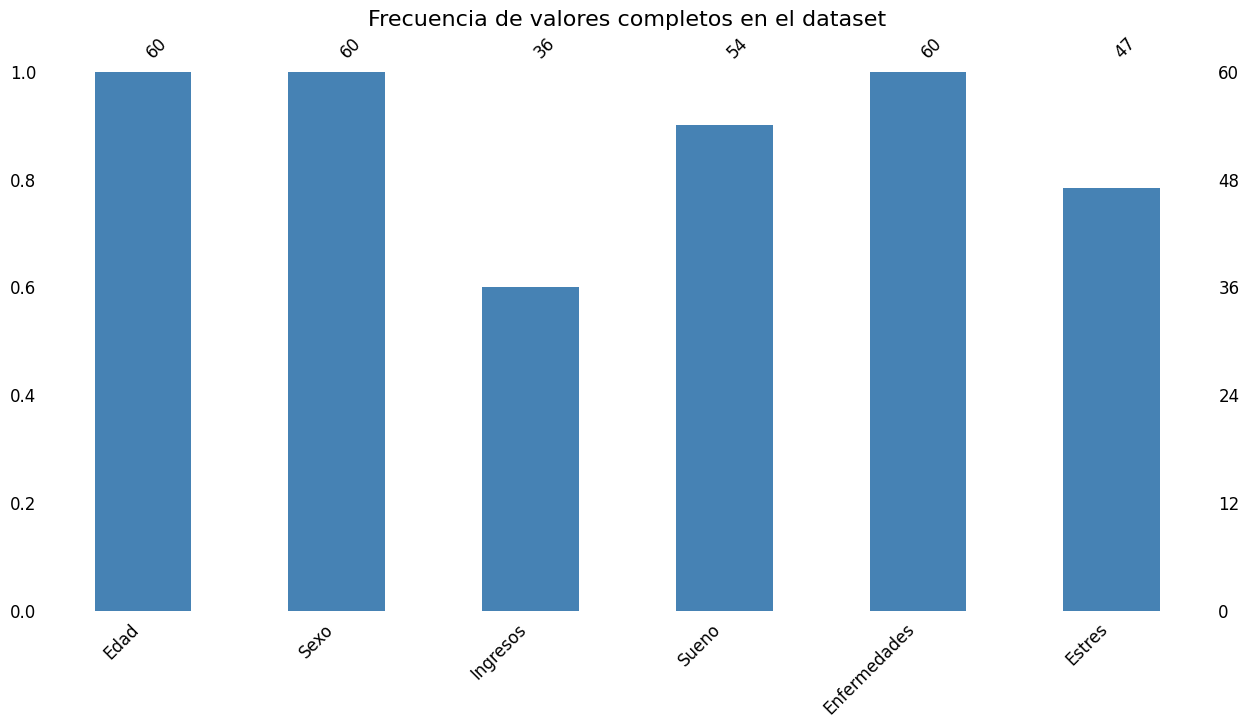

In [28]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(datos, figsize=(15,7), fontsize=12, color='steelblue')
plt.title('Frecuencia de valores completos en el dataset', fontsize=16)
plt.show()

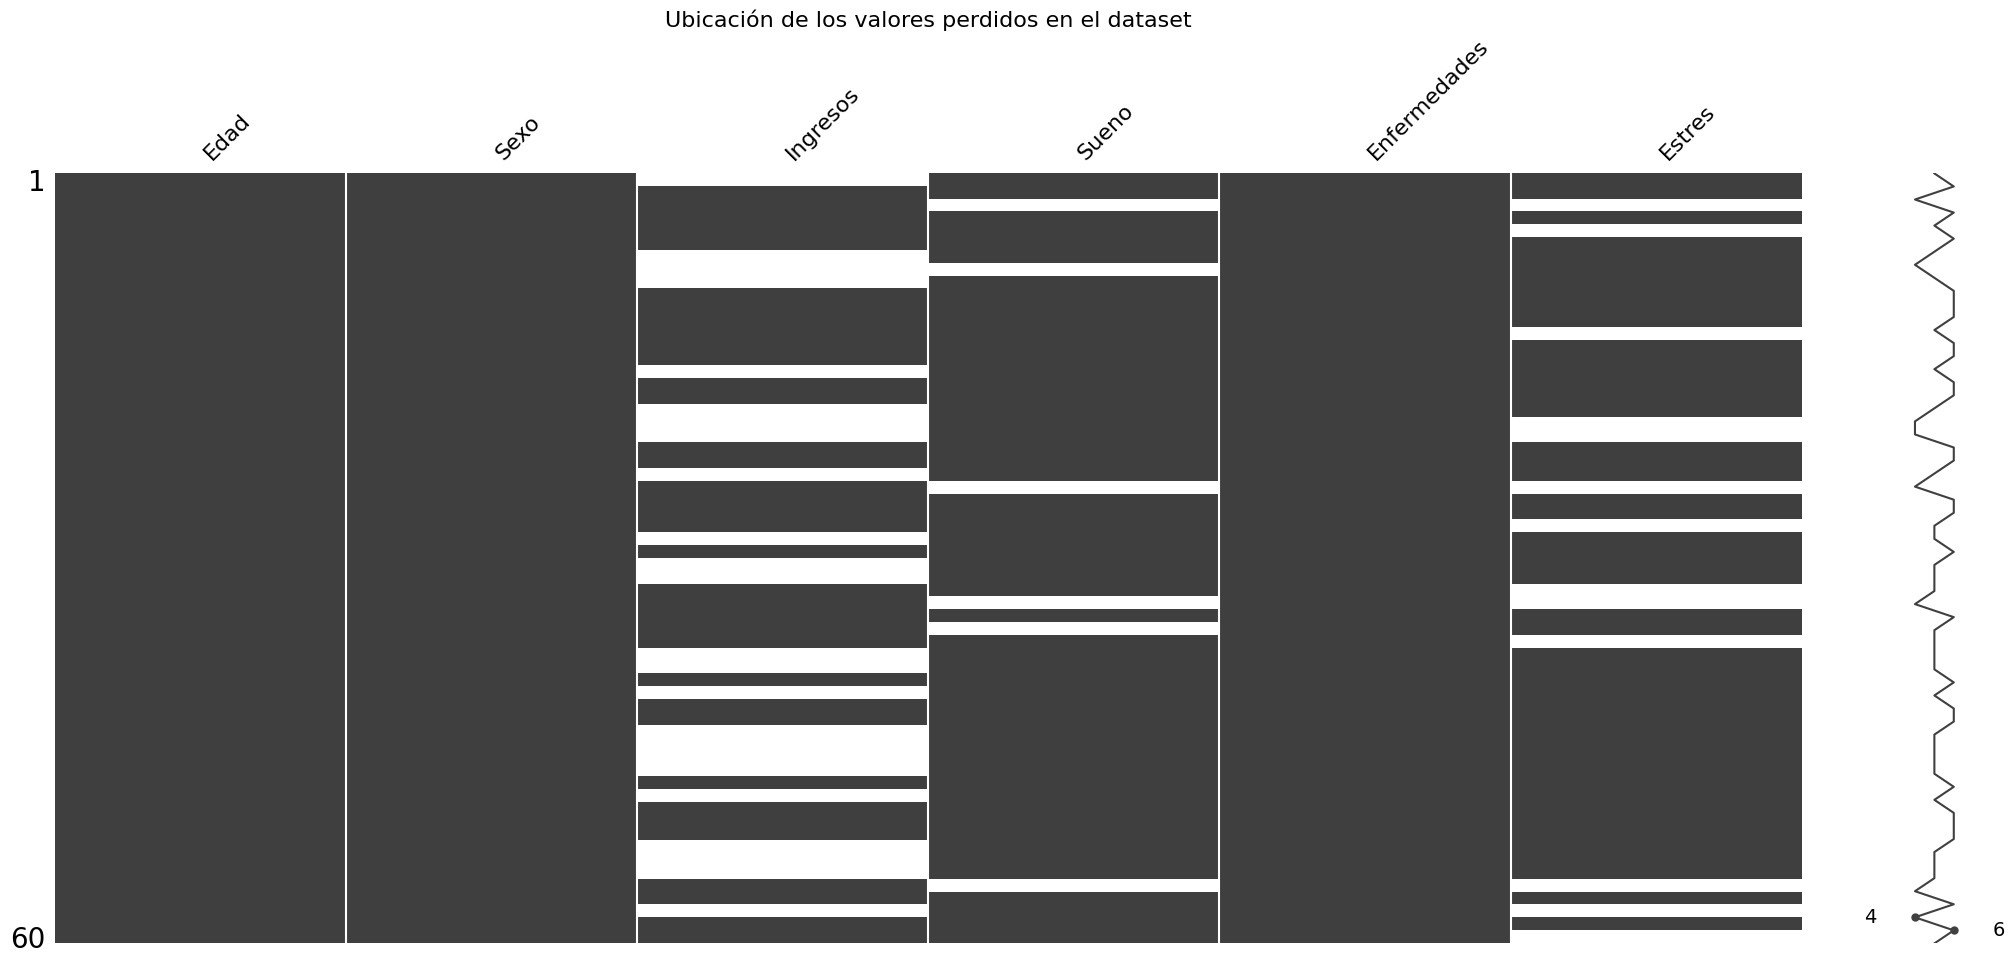

In [29]:
msno.matrix(datos) # permite ver los missings como espacios en blanco
plt.title('Ubicación de los valores perdidos en el dataset', fontsize=16)
plt.show()

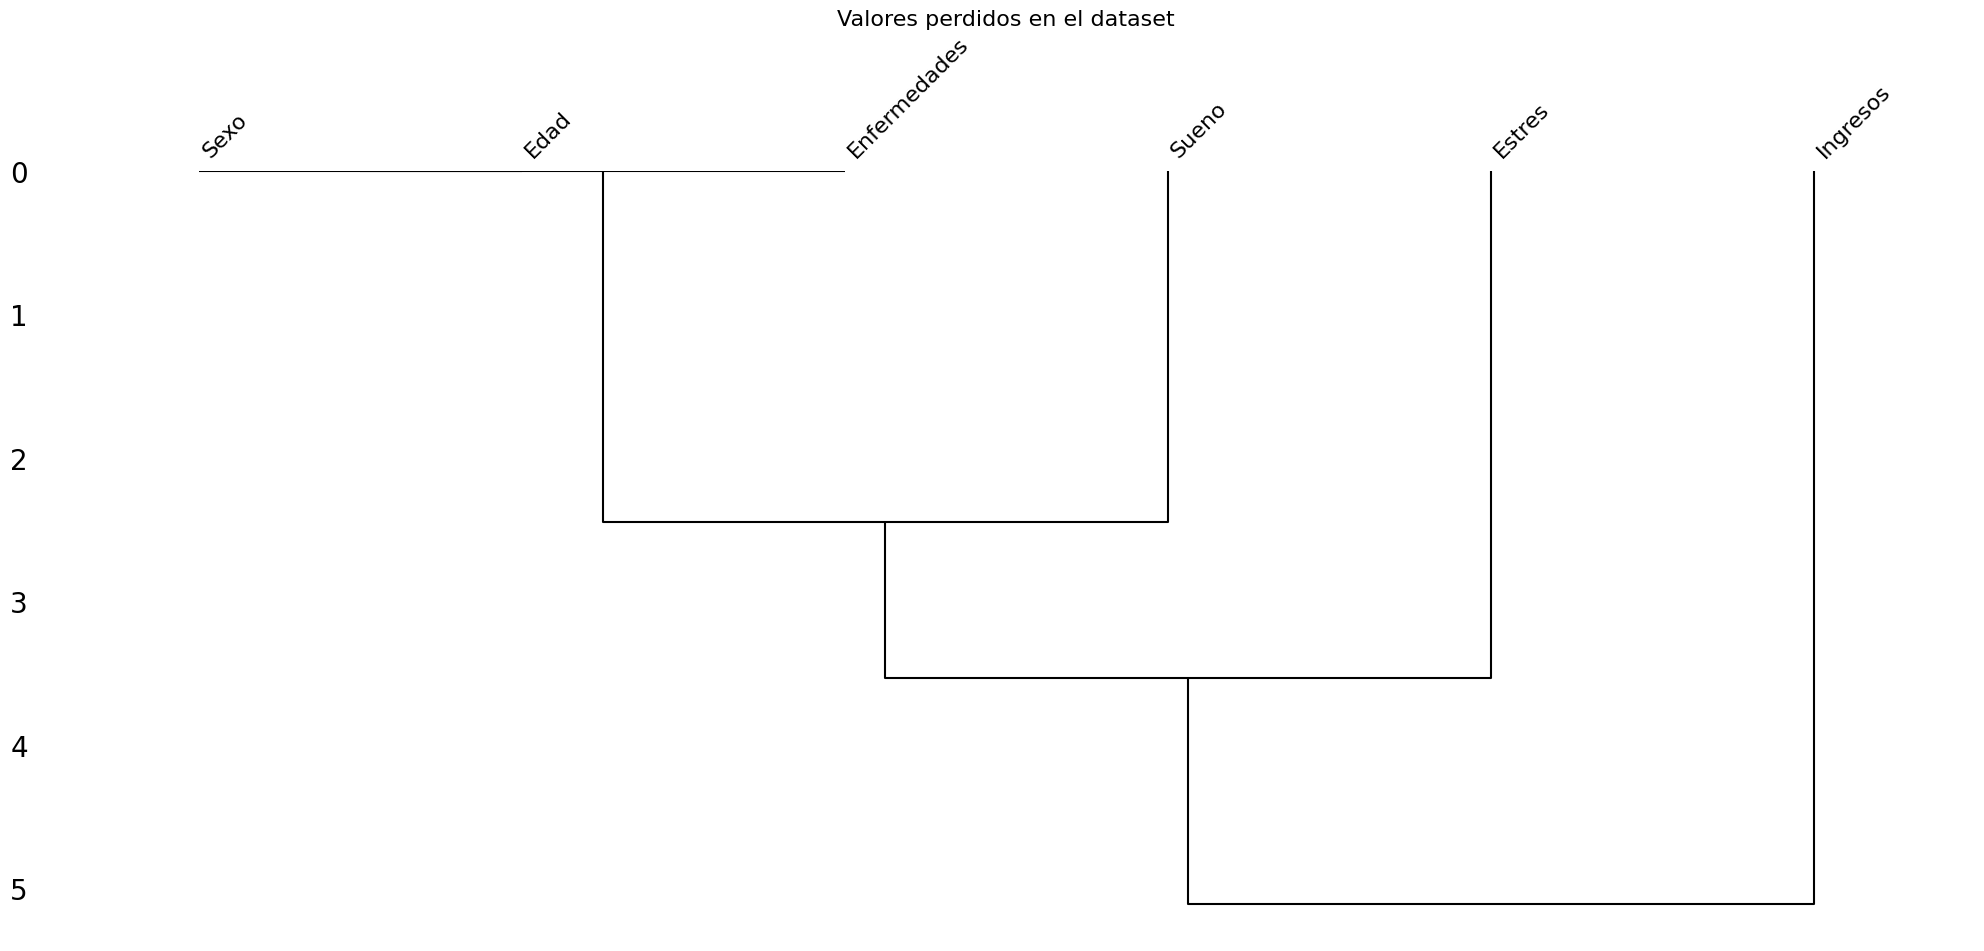

In [30]:
msno.dendrogram(datos)
plt.title('Valores perdidos en el dataset', fontsize=16)
plt.show()

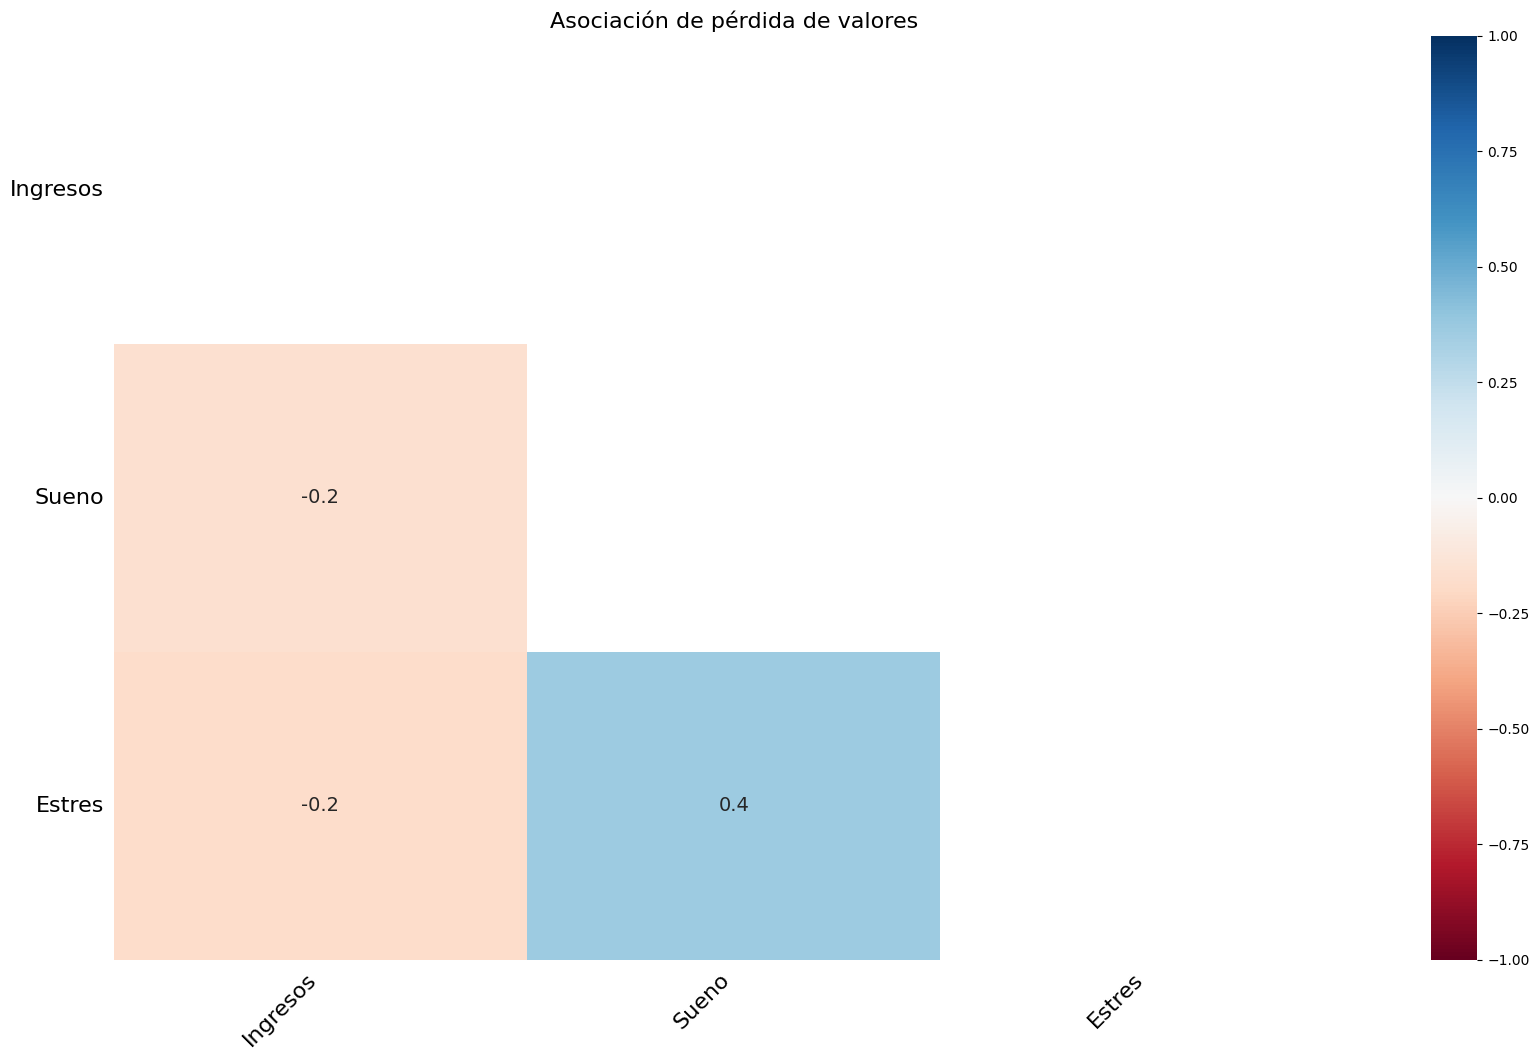

In [31]:
msno.heatmap(datos)
plt.title('Asociación de pérdida de valores', fontsize=16)
plt.show()
# Varía entre -1 (si una variable está presente, la otra está ausente, y viceversa)
# 0 (la presencia o ausencia de datos de una variable no se relaciona con la otra) a
# 1 (si una variable está presente, la otra también, o si una está ausente la otra también).

In [32]:
%load_ext rpy2.ipython

In [33]:
%R -i datos

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [34]:
%R datos |> head(5)

,Edad,Sexo,Ingresos,Sueno,Enfermedades,Estres
0,56,Masculino,NaN,5.4,Si,8.0
1,66,Femenino,90592.0,9.4,Si,8.0
2,64,Masculino,74268.0,NaN,No,NaN
3,44,Femenino,28110.0,7.8,Si,10.0
4,20,Femenino,82623.0,5.0,Si,NaN


In [ ]:
%R install.packages("naniar")

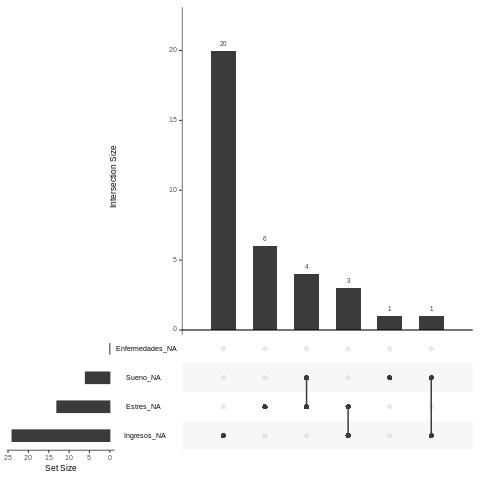

In [36]:
%%R
library(naniar)
datos |> gg_miss_upset()

# **Comparación MCAR vs MAR**

## Revisión exploratoria

In [42]:
datos[datos['Ingresos'].isnull()].describe(), datos[datos['Ingresos'].notnull()].describe()

(            Edad  Ingresos      Sueno     Estres
 count  24.000000       0.0  23.000000  21.000000
 mean   52.125000       NaN   6.553913   5.380952
 std    17.218071       NaN   1.841081   3.383433
 min    24.000000       NaN   4.000000   1.000000
 25%    39.750000       NaN   5.000000   2.000000
 50%    54.000000       NaN   6.000000   7.000000
 75%    69.000000       NaN   8.000000   8.000000
 max    79.000000       NaN   9.620000  10.000000,
             Edad      Ingresos      Sueno     Estres
 count  36.000000     36.000000  31.000000  26.000000
 mean   51.250000  62667.500000   7.130323   5.615385
 std    20.140045  23687.064474   1.678623   3.047319
 min    19.000000  22568.000000   4.000000   1.000000
 25%    37.500000  43978.250000   5.475000   3.000000
 50%    52.000000  65373.500000   7.800000   6.000000
 75%    68.500000  82801.000000   8.350000   7.750000
 max    79.000000  99309.000000   9.500000  10.000000)

In [43]:
datos[datos['Sueno'].isnull()].describe(), datos[datos['Sueno'].notnull()].describe()

(            Edad      Ingresos  Sueno    Estres
 count   6.000000      5.000000    0.0  2.000000
 mean   53.666667  74873.400000    NaN  7.500000
 std    19.022793  16368.843203    NaN  0.707107
 min    20.000000  50535.000000    NaN  7.000000
 25%    51.000000  72256.000000    NaN  7.250000
 50%    55.500000  74268.000000    NaN  7.500000
 75%    62.250000  81858.000000    NaN  7.750000
 max    77.000000  95450.000000    NaN  8.000000,
             Edad      Ingresos      Sueno     Estres
 count  54.000000     31.000000  54.000000  45.000000
 mean   51.370370  60698.806452   6.884815   5.422222
 std    19.027583  24290.513478   1.756341   3.208574
 min    19.000000  22568.000000   4.000000   1.000000
 25%    38.000000  40220.000000   5.315000   2.000000
 50%    50.000000  60774.000000   7.250000   6.000000
 75%    69.000000  82979.000000   8.275000   8.000000
 max    79.000000  99309.000000   9.620000  10.000000)

In [44]:
datos[datos['Estres'].isnull()].describe(), datos[datos['Estres'].notnull()].describe()

(            Edad      Ingresos     Sueno  Estres
 count  13.000000     10.000000  9.000000     0.0
 mean   33.307692  61251.000000  6.824444     NaN
 std    18.988526  23294.841313  1.891924     NaN
 min    19.000000  23561.000000  4.200000     NaN
 25%    20.000000  51706.750000  5.100000     NaN
 50%    26.000000  60300.500000  6.320000     NaN
 75%    29.000000  79960.500000  8.300000     NaN
 max    77.000000  95450.000000  9.500000     NaN,
             Edad      Ingresos      Sueno     Estres
 count  47.000000     26.000000  45.000000  47.000000
 mean   56.659574  63212.307692   6.896889   5.510638
 std    15.566515  24270.201655   1.750432   3.168269
 min    32.000000  22568.000000   4.000000   1.000000
 25%    41.000000  42858.750000   5.360000   2.500000
 50%    57.000000  69413.000000   7.300000   6.000000
 75%    70.000000  83611.750000   8.200000   8.000000
 max    79.000000  99309.000000   9.620000  10.000000)

## RBtest

Test de verificación de tipo de valores perdidos usando el enfoque de regresión

La respuesta puede dar:

- 0: variable(s) con datos MCAR

- 1: variable(s) con datos MAR

- -1: variable(s) con datos completos

In [ ]:
%R install.packages("RBtest")

In [60]:
%%R
library(RBtest)
library(dplyr)

In [61]:
%%R
datos |> RBtest()

$abs.nbrMD
        Edad         Sexo     Ingresos        Sueno Enfermedades       Estres 
           0            0           24            6            0           13 

$rel.nbrMD
        Edad         Sexo     Ingresos        Sueno Enfermedades       Estres 
        0.00         0.00         0.40         0.10         0.00         0.22 

$type
        Edad         Sexo     Ingresos        Sueno Enfermedades       Estres 
          -1           -1            0            0           -1            1 



## Test MCAR de Little

$H_0$: Los datos siguen un patrón MCAR

$H_1$: Los datos no siguen un patrón MCAR

In [47]:
%%R
library(dplyr)
datos |> select(Edad,Sexo,Enfermedades) |> mcar_test()

# A tibble: 1 × 4
  statistic    df p.value missing.patterns
      <dbl> <dbl>   <dbl>            <int>
1         0     0       1                1


El pvalor nos sirve para tomar una decisión respecto a la **hipótesis nula**. La regla de decisión es: **Si pvalor < nivel de significancia, entonces se rechaza H0**

Recordar que todo pvalor toma valores entre 0 y 1.

Entonces, en este caso pvalor = 1, por lo tanto se debería aceptar la hipótesis nula (los datos siguen un patrón MCAR). Sin embargo, los datos están completos. Por lo tanto, solo se debe usar esta prueba cuando hay al menos un dato perdido en el data frame.

In [49]:
%%R
datos |> mcar_test()

# A tibble: 1 × 4
  statistic    df p.value missing.patterns
      <dbl> <dbl>   <dbl>            <int>
1      33.9    27   0.169                7


El pvalor (0.169) es alto (mayor que los niveles de significancia usuales), por lo tanto se acepta la hipótesis nula de mecanismo MCAR.

In [50]:
%%R
datos |> select(Edad,Sexo,Enfermedades,Estres) |> mcar_test()

# A tibble: 1 × 4
  statistic    df p.value missing.patterns
      <dbl> <dbl>   <dbl>            <int>
1      16.2     3 0.00102                2


El pvalor (0.0066) es muy pequeño (menor a los niveles de significancia 0.01, 0.05, 0.10). Entonces se rechaza  la hipótesis nula, por lo tanto los datos no siguen un patrón MCAR.

## Prueba de independencia - Prueba Chi Cuadrado (pérdida vs variable cualitativa)

Cuando se tiene interés en cruzar el mecanismo de datos perdidos en una variable con otra (categórica) de interés (completa).

$H_0:$ El mecanismo de datos perdidos en [variable con datos perdidos] y la [variable de interés completa] son independientes

$H_1:$ El mecanismo de datos perdidos en [variable con datos perdidos] y la [variable de interés completa] **no** son independientes

**El tamaño de muestra debe ser grande, de modo que la frecuencia esperada en cada celda sea superior a 5.**

Asumiendo $\alpha=0.05$

In [55]:
%%R
datos$Sexo

 [1] "Masculino" "Femenino"  "Masculino" "Femenino"  "Femenino"  "Femenino" 
 [7] "Femenino"  "Femenino"  "Masculino" "Femenino"  "Masculino" "Femenino" 
[13] "Femenino"  "Femenino"  "Femenino"  "Masculino" "Femenino"  "Masculino"
[19] "Femenino"  "Femenino"  "Femenino"  "Masculino" "Femenino"  "Masculino"
[25] "Femenino"  "Masculino" "Masculino" "Femenino"  "Masculino" "Femenino" 
[31] "Femenino"  "Femenino"  "Femenino"  "Femenino"  "Femenino"  "Femenino" 
[37] "Femenino"  "Femenino"  "Femenino"  "Femenino"  "Masculino" "Masculino"
[43] "Femenino"  "Femenino"  "Femenino"  "Femenino"  "Femenino"  "Masculino"
[49] "Femenino"  "Femenino"  "Femenino"  "Masculino" "Femenino"  "Masculino"
[55] "Femenino"  "Masculino" "Femenino"  "Masculino" "Femenino"  "Masculino"


In [56]:
%%R
chisq.test(table(as_shadow(datos)$Ingresos_NA, datos$Sexo))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(as_shadow(datos)$Ingresos_NA, datos$Sexo)
X-squared = 6.9198e-31, df = 1, p-value = 1



In [57]:
%%R
chisq.test(table(as_shadow(datos)$Ingresos_NA, datos$Enfermedades))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(as_shadow(datos)$Ingresos_NA, datos$Enfermedades)
X-squared = 0.025112, df = 1, p-value = 0.8741



In [58]:
%%R
chisq.test(table(as_shadow(datos)$Sueno_NA, datos$Enfermedades))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(as_shadow(datos)$Sueno_NA, datos$Enfermedades)
X-squared = 1.2574, df = 1, p-value = 0.2621

